In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')
x = dfx.values
y = dfy.values

In [3]:
#print(x.shape)
#print(x)
#plt.scatter(x,y)
#plt.show()
x = x.reshape((-1,))
y = y.reshape((-1,))
#print(x.shape)
#print(x)
X = (x-x.mean())/x.std()
Y = y
#plt.scatter(X,Y)
#plt.show()

In [4]:
def hypothesis(x,theta):
    return(theta[0]+theta[1]*x)

In [13]:
def error(x,y,theta):
    m=x.shape[0]
    error=0
    for i in range(m):
        h=hypothesis(x[i],theta)  # you were not computing hypothesis correctly.
        error += (h-y[i])**2
    return error/m


In [14]:
def gradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros(2)
    for i in range(m):
        h=hypothesis(x[i],theta)
        grad[0]+=(h-y[i])       # Problem was here
        grad[1]+=(h-y[i])*x[i] # and here
    return grad

In [15]:
def gradient_descent(x,y,k=.001):
    theta=np.array([-1.0, 0.6])
    m=x.shape[0]
    itr=50
    err_list=[]
    for i in range(itr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        err_list.append(e)
        theta[0]=theta[0]-k*grad[0]
        theta[1]=theta[1]-k*grad[1]
    return theta,err_list

In [8]:
def prediction(x,theta):
    m=x.shape[0]
    Y_Predicted=[]
    for i in range(m):
        y=hypothesis(x[i],theta)
        Y_Predicted.append(y)
    Y_Predicted=np.array(Y_Predicted)
    return Y_Predicted

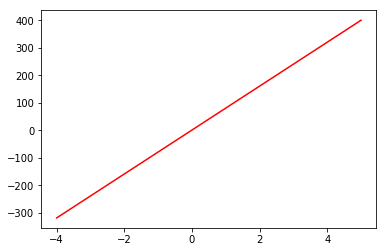

In [16]:
final_theta=np.zeros((2,))
final_theta, error_list = gradient_descent(X,Y, k= 0.0001)
#plt.plot(final_theta)
#plt.plot(error_list)
#plt.show()
xt=np.arange(-4,6)                               
plt.plot(xt,hypothesis(xt,final_theta),color='r',label="Predicted Value ") 
plt.show() 

In [17]:
#Y_Predicted_Values=prediction(X,final_theta)    
#print(Y_Predicted_Values)
dx = pd.read_csv('Linear_X_Test.csv')

In [20]:
x=dx.values
#print(x.shape)
x=x.reshape((-1,))
#print(x.shape)
y=prediction(x,final_theta)    
print(y)
pd.DataFrame(y).to_csv("../outputLinear_Y_Test.csv")       

[-149.37466337  -68.7567667  -201.49222226 ...   10.91242825  -21.53292954
  -53.68602632]
